- source code: [`kerasy.ML.decomposition`](https://github.com/iwasakishuto/Kerasy/blob/gh-pages/kerasy/ML/decomposition.py)

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import matplotlib.cm as cm
import matplotlib.pyplot as plt

## Data

In [3]:
from kerasy.datasets import mnist

In [4]:
seed = 0
Nimg_per_cls = 250

In [5]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [6]:
n_train, _, _ = x_train.shape
n_test,  _, _ = x_test.shape

In [7]:
x_train = x_train.reshape(n_train, -1)

In [8]:
# Chose Nimg_per_cls images for each class. 
idxes = np.concatenate([np.random.RandomState(seed).choice(np.where(y_train==cls)[0], Nimg_per_cls) for cls in np.unique(y_train)])

In [9]:
# Selected images and labels.
X = x_train[idxes]
Y = y_train[idxes]

In [10]:
N, D = X.shape
print(f"Num of data    : {N}")
print(f"Num of features: {D}")

Num of data    : 2500
Num of features: 784


In [11]:
# The dimensions of how many 
n_components = 2

In [12]:
def plotMNIST(X, Y, n_samples=N,method="", ax=None):
    if ax is None: fig,ax=plt.subplots()
    """ Visualize the results. """
    for cls in np.unique(Y):
        idx = cls==Y
        ax.scatter(X[idx,0], X[idx,1], color=cm.jet(cls/10), s=20, label=cls)
    ax.legend(), ax.set_xlabel("Component 1", fontsize=14), ax.set_ylabel("Component 2", fontsize=14), ax.set_title(f"{method} (n_samples={n_samples})", fontsize=14)
    return ax

## PCA

In [13]:
from kerasy.ML.decomposition import PCA

In [14]:
model = PCA(n_components=n_components)

In [15]:
model.fit(X)

In [16]:
X_transformed = model.transform(X)

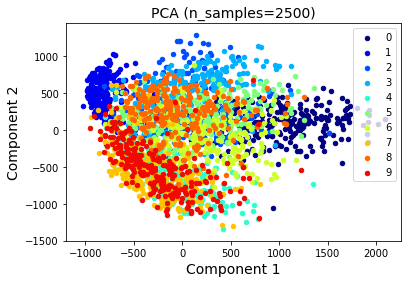

In [17]:
ax = plotMNIST(X_transformed, Y, method="PCA")
plt.show()

## kPCA

In [18]:
from kerasy.ML.decomposition import KernelPCA

In [19]:
model = KernelPCA(n_components=n_components, kernel="gaussian", sigma=10)

In [20]:
X_ = X/255.

In [21]:
X_transformed = model.fit_transform(X_)

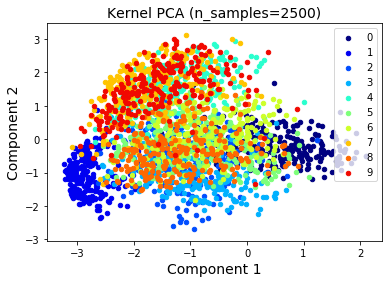

In [22]:
ax = plotMNIST(X_transformed, Y, method="Kernel PCA")
plt.show()

## tSNE

In [23]:
from kerasy.ML.decomposition import tSNE

In [24]:
model = tSNE(initial_momentum = 0.5, final_momoentum = 0.8, eta = 500)

In [25]:
X_transformed = model.fit_transform(X, n_components=n_components, initial_dims=50, perplexity=30.0, random_state=seed)

Preprocessing the data using PCA to reduce the dimentions 784→50
Each conditional Gaussian has the same perplexity: 30.0
Mean value of sigma: 0.001

1/10
100/100 [####################] 100.00% - 51.995s  KL(P||Q) = 16.972
2/10
100/100 [####################] 100.00% - 49.099s  KL(P||Q) = 1.514
3/10
100/100 [####################] 100.00% - 44.755s  KL(P||Q) = 1.314
4/10
100/100 [####################] 100.00% - 44.678s  KL(P||Q) = 1.234
5/10
100/100 [####################] 100.00% - 46.334s  KL(P||Q) = 1.190
6/10
100/100 [####################] 100.00% - 46.168s  KL(P||Q) = 1.163
7/10
100/100 [####################] 100.00% - 45.581s  KL(P||Q) = 1.145
8/10
100/100 [####################] 100.00% - 45.763s  KL(P||Q) = 1.131
9/10
100/100 [####################] 100.00% - 46.656s  KL(P||Q) = 1.121
10/10
100/100 [####################] 100.00% - 45.708s  KL(P||Q) = 1.114


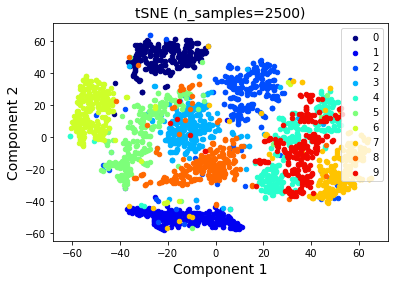

In [26]:
ax = plotMNIST(X_transformed, Y, method="tSNE")
plt.show()